# Переобучение, аугментация данных

### i. Функция VIA --> YOLO для сегментации

In [35]:
import pandas as pd
import os

**VIA --> YOLO для детекции**, разметка в файле csv:

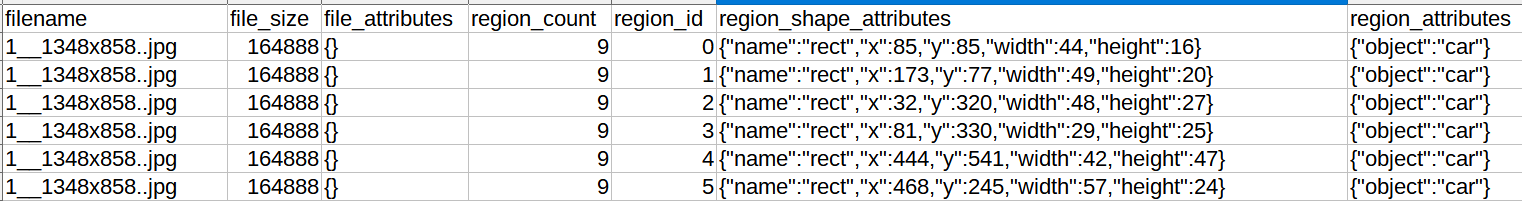

In [ ]:
def VIA2YOLO_detect(data, cls_codes, out_dir, imgsize):
    
    '''
    Converts VIA detection (x,y,w,h-rects expected) annotations (one .csv file)
    to individual YOLO-formatted txt files for each img with objects.
    Empty imgs have no any files. Params:
    
    -data (path-like string) - source .csv  VIA annotation
    -clscodes (dict) - class name-to-index mapping: {'dog':0, 'cat':1 ...}
    -out - dir for generated .txt files (will be created if not exist)
    -imgsize (tuple of ints) - size (H,W) of annotated imgs (expected all the same)
    '''
    
    annot = pd.read_csv(data, index_col=0)
#     annot.drop(['file_size', 'file_attributes'], axis=1, inplace=True)
    
    if not os.path.exists(out_dir):
        os.mkdir(out_dir)
        
    for label, row in annot.iterrows():
        name, r_count, coords, cls = label, int(row[2]), json.loads(row[4]), json.loads(row[5])
        cls = str(cls)
        
#         пустые файлы разметок для изображений без разметок
        if r_count == 0:
            with open(out_dir + str(label[:-4]) + '.txt', 'w') as f:
                f.write('')
        
        if r_count == 1:
            if coords['name'] == 'rect':
                xywh = []
                xywh.append(coords['x']/imgsize[0] + (coords['width']/imgsize[0])/2)
                xywh.append(coords['y']/imgsize[1] + (coords['height']/imgsize[1])/2)
                xywh.append(coords['width']/imgsize[0])
                xywh.append(coords['height']/imgsize[1])

                for key in cls_codes.keys():
                    if key in cls:
                        cls_id = cls_codes[key]

                fin_str = str(cls_id) + ' ' + str(xywh)[1:-1].replace(',','')

                with open(out_dir + str(label[:-4]) + '.txt', 'w') as f:
                    f.write(fin_str + '\n')
            
        if r_count > 1:
            if coords['name'] == 'rect':
                xywh = []
                xywh.append(coords['x']/imgsize[0] + (coords['width']/imgsize[0])/2)
                xywh.append(coords['y']/imgsize[1] + (coords['height']/imgsize[1])/2)
                xywh.append(coords['width']/imgsize[0])
                xywh.append(coords['height']/imgsize[1])

                for key in cls_codes.keys():
                    if key in cls:
                        cls_id = cls_codes[key]

                fin_str = str(cls_id) + ' ' + str(xywh)[1:-1].replace(',','')

                with open(out_dir + str(label[:-4]) + '.txt', 'a') as f:
                    f.write(fin_str + '\n')
    
    return annot['region_attributes'].value_counts()

In [ ]:
data = 'path/to/data.csv' # путь к директории с разметкой .csv формата VIA
out_dir = 'path/to/generated/labels/' # путь к директории с генерированными разметками

# словарь соответствий имен классов индексам разметки в VIA
mcodes = {
    'class_0': 0, 
    'class_1': 1,
    'class_2': 2
    #...
}

VIA2YOLO_detect(data, mcodes, out_dir, (640, 640))

**VIA --> YOLO для сегментации**, , разметка в файле csv:

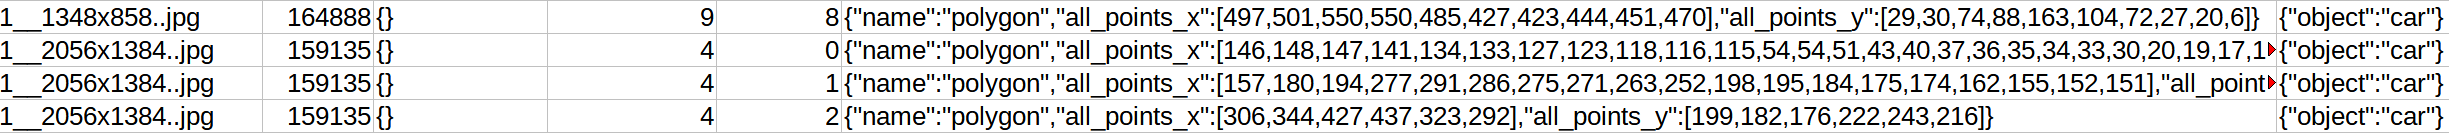

In [ ]:
def VIA2YOLO_segment(data, cls_codes, out_dir, imgsize):
    
    '''
    Converts VIA segmentation (x,y-paired polygons expected) annotations 
    (one .csv file) to individual YOLO-formatted txt files for each img 
    with objects. Empty imgs have empty files. Params:
    
    -data (path-like string) - source .csv  VIA annotation
    -clscodes (dict) - class name-to-index mapping: {'dog':0, 'cat':1 ...}
    -out - dir for generated .txt files (will be created if not exist)
    -imgsize (tuple of ints) - size (H,W) of annotated imgs (expected all the same)
    '''
    
    annot = pd.read_csv(data, index_col=0)
    annot.drop(['file_size', 'file_attributes'], axis=1, inplace=True)
    
    if not os.path.exists(out_dir):
        os.mkdir(out_dir)
        
    for label, row in annot.iterrows():
        name, r_count, coords, cls = label, int(row[0]), json.loads(row[2]), json.loads(row[3])
        cls = str(cls)
        
#         пустые файлы разметок для изображений без разметок
        if r_count == 0:
            with open(str(out_dir + label[:-4]) + '.txt', 'w') as f:
                f.write('')
        
        if r_count == 1:
            if coords['name'] == 'polygon':
                xy = []
                for x, y in zip(coords['all_points_x'], coords['all_points_y']):
                    xy.append(x/imgsize[0])
                    xy.append(y/imgsize[1])

                for key in cls_codes.keys():
                    if key in cls:
                        cls_id = cls_codes[key]

                fin_str = str(cls_id) + ' ' + str(xy)[1:-1].replace(',','')

                with open(out_dir + str(label[:-4]) + '.txt', 'w') as f:
                    f.write(fin_str + '\n')
            
        if r_count > 1:
            if coords['name'] == 'polygon':
                xy = []
                for x, y in zip(coords['all_points_x'], coords['all_points_y']):
                    xy.append(x/imgsize[0])
                    xy.append(y/imgsize[1])

                for key in cls_codes.keys():
                    if key in cls:
                        cls_id = cls_codes[key]

                fin_str = str(cls_id) + ' ' + str(xy)[1:-1].replace(',','')

                with open(out_dir + str(label[:-4]) + '.txt', 'a') as f:
                    f.write(fin_str + '\n')
    
    return annot['region_attributes'].value_counts()

In [ ]:
data = 'path/to/data.csv' # путь к директории с разметкой .csv формата VIA
out_dir = 'path/to/generated/labels/' # путь к директории с генерированными разметками

# словарь соответствий имен классов индексам разметки в VIA
mcodes = {
    'class_0': 0, 
    'class_1': 1,
    'class_2': 2
    #...
}

VIA2YOLO_segment(data, mcodes, out_dir, (640, 640)) # H,W формат

### ii. ОС по ДЗ: от хардкодинга до универсализации

In [ ]:
import hashlib as hl

In [ ]:
def hashed(row):
    values_to_hash = f"{row['date']} {row['time']} {row['lat']} {row['lon']}"
    hashed_value = hl.sha256(values_to_hash.encode('utf-8')).hexdigest()
    row['date'], row['time'], row['lat'], row['lon'] = hashed_value[:16], hashed_value[16:32], hashed_value[32:48], hashed_value[48:]
    return row

In [4]:
filenames = ['338.jpg', '343.jpg', '1083.jpg', '2411.jpg']
filenames

['338.jpg', '343.jpg', '1083.jpg', '2411.jpg']

In [ ]:
def hashed(df_to_hash, cols_to_hash):
    for col in cols_to_hash:
        df[col] = df[col].apply(lambda x: hashlib.sha256(str(x).encode()).hexdigest())
    return 

In [36]:
os.getcwd() + '/my_images'

'C:\\Users\\merr\\Desktop\\КУРС\\Вебики\\13'

In [37]:
filenames = os.listdir(os.getcwd())
filenames

['.ipynb_checkpoints',
 '.~lock.via_project_8Nov2024_19h15m_csv.csv#',
 'data',
 'overfit_data_aug.ipynb',
 'via_project_8Nov2024_19h15m_csv.csv',
 'Демки',
 'Феномен переобучения.ipynb']

# Аугментация данных для борьбы с переобучением

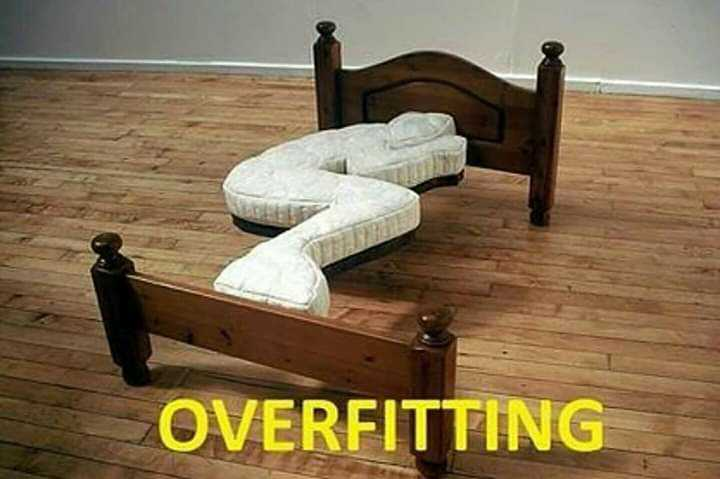

- **Недообучение**: high bias + low variance. Сложность модели недостаточна для улавливания закономерностей в данных (часто нелинейных). Аналогия: "троечник". **Переобучение**: low bias + high variance. Сложность модели позволяет ей идеально подстраиваться под данные. Аналогия: "отличник-зубрила"
- НС не просто "ассоциативные машины", это **статистические** ассоциативные машины. Главнейший принцип стаистики: **garbage in - garbage out**. Качество результата определяется данными в не меньшей (может и большей) степени, чем сложностью архитектуры и "продвинутостью" алгоритма.
- Сложность архитектуры (число слоев) и алгоритма (количество "улучшайзеров") должны быть **адекватны** сложности данных. Под сложностью данных подразуметвается их разнообразие и объем. Аритектура попроще часто даст лучший результат на небольшом наборе данных, чем большая сеть на нем же. Но большая сеть даст **намного лучше** результат на большом и разнообразном датасете.
- Как подобрать нужный размер (и архитектуру) сети под определенный объем данных (или наоборот - собрать данные под анализ определенным алгоритмом)? **Точного рецепта нет**. Слишком много факторов, это поле для экспериментов.

### Обогащение данных
Современные доступные архитектуры сложны и эффективны. Для работы с ними нужно собирать (создавать) сложные наборы данных! 
1. Сбор дополнительных реальных данных
2. Аугментация данных - разная степень модификации копий элементов реальных данных
3. Создание синтетических данных - полностью синтезированные изображения

# Обучение с регуляризацией: эксперименты

Мы уже рассматривали различные методы регуляризации. Несколько экспериментов по регуляризации моделей разных размеров. Используем batchnorm, dropout, аугментацию данных. Работаем с данными "FashionMNIST". Оптимизация с помощью SGD и планировщика LR (LambdaLR)

### Эксперименты:

1. **Небольшая модель (SmallModel - S)**, точность даже на обучнии достигает примерно 90% (модель не достаочно сложна)
2. **Модель большего размера (MediumModel - M)**
3. **Увеличение объема данных: аугментация** При самостоятельном использовании увеличение объема данных оказывается лучше, чем все вышеперечисленные методы. Почему это так? Это связано с тем, что это виртуальный способ увеличить количество обучающих данных, что, в свою очередь, помогает в обобщении модели. 

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt  # one of the best graphics library for python
plt.style.use('ggplot')

In [9]:
import os
import time

from typing import Iterable
from dataclasses import dataclass

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch.optim import lr_scheduler

## Используемые методы аугментации

- Random Horizontal Flip
- Random Vertical Flip
- Random Rotation

In [10]:
def get_data(batch_size, data_root='./data', num_workers=1, data_augmentation=False):
    
    # общие (т.е. обязательные) трасформации
    common_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.2860, ), (0.3530, ))  # нормализуем на mean, std именно для FashionMNIST!
    ])
    
    # если data_augmentation = True, включаются эти трансформации
    if data_augmentation:
        train_transforms = transforms.Compose([
            transforms.RandomChoice([
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.RandomRotation(20, fill=(0,)),
                transforms.RandomCrop(28, padding=4)
            ]),
            transforms.ToTensor(),
            transforms.Normalize((0.2860, ), (0.3530, ))
        ])
    # если data_augmentation = False, делаем общие трансформации
    else:
        train_transforms = common_transforms
        
    # train dataloader
    train_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST(root=data_root, train=True, download=True, transform=train_transforms),
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    )
    
    # test dataloader
    test_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST(root=data_root, train=False, download=True, transform=common_transforms),
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )
    return train_loader, test_loader

##  Конфиги: классы-обертки

In [12]:
@dataclass
class SystemConfiguration:
    '''
    Describes the common system setting needed for reproducible training
    '''
    seed: int = 21  # seed number to set the state of all random number generators
    cudnn_benchmark_enabled: bool = True  # enable CuDNN benchmark for the sake of performance
    cudnn_deterministic: bool = True  # make cudnn deterministic (reproducible training)

In [13]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 32  
    epochs_count: int = 60
    init_learning_rate: float = 0.02  # начальный LR для планировщика
    decay_rate: float = 0.1  # темп затухания LR
    log_interval: int = 500  
    test_interval: int = 1  
    data_root: str = './data' 
    num_workers: int = 10  
    device: str = 'cuda'  

## Функция устновки системных настроек

In [14]:
def setup_system(system_config: SystemConfiguration) -> None:
    torch.manual_seed(system_config.seed)
    if torch.cuda.is_available():
        torch.backends.cudnn_benchmark_enabled = system_config.cudnn_benchmark_enabled
        torch.backends.cudnn.deterministic = system_config.cudnn_deterministic

## Функция обучения

In [15]:
def train(
    train_config: TrainingConfiguration, model: nn.Module, optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader, epoch_idx: int
) -> None:
    
    model.train()
    batch_loss = np.array([])
    batch_acc = np.array([])
        
    for batch_idx, (data, target) in enumerate(train_loader):
        
        indx_target = target.clone()         # копируем тензор истинных меток
        data = data.to(train_config.device) # отправка данных на CPU / GPU
        target = target.to(train_config.device) # тензор истинных меток на CPU / GPU

        optimizer.zero_grad() # обнуление градиентов
        output = model(data) # прямой проход
        loss = F.cross_entropy(output, target) # расчет кросс-энтропии
       
        loss.backward()  # расчет градиентов по отношению к веам модели
        optimizer.step()  # обновление весов по градиентам
        
        batch_loss = np.append(batch_loss, [loss.item()])
        
        prob = F.softmax(output, dim=1) # probability score после softmax
        pred = prob.data.max(dim=1)[1]    # индекс с макисмальной probability
                        
        correct = pred.cpu().eq(indx_target).sum() # подсчет правильных предсказаний
            
        acc = float(correct) / float(len(data)) # точность
        batch_acc = np.append(batch_acc, [acc])

#         if batch_idx % train_config.log_interval == 0 and batch_idx > 0:              
#             print(
#                 'Train Epoch: {} [{}/{}] Loss: {:.6f} Acc: {:.4f}'.format(
#                     epoch_idx, batch_idx * len(data), len(train_loader.dataset), loss.item(), acc
#                 )
#             )
            
    epoch_loss = batch_loss.mean()
    epoch_acc = batch_acc.mean()
    print('Epoch: {} Train Loss: {:.6f} Acc: {:.4f}'.format(
                epoch_idx, epoch_loss, epoch_acc))
    return epoch_loss, epoch_acc

## Функция проверки

In [16]:
def validate(
    train_config: TrainingConfiguration, model: nn.Module, 
    test_loader: torch.utils.data.DataLoader,
) -> float:

    model.eval() # модель в режиме оценки (не обучается)
    test_loss = 0
    count_corect_predictions = 0
    
    for data, target in test_loader:
        indx_target = target.clone()
        data = data.to(train_config.device)
        target = target.to(train_config.device)
        
        output = model(data)  # значение loss для каждого батча
        test_loss += F.cross_entropy(output, target).item()
        
        prob = F.softmax(output, dim=1) # probability score после softmax
        pred = prob.data.max(dim=1)[1] # индекс с макисмальной probability
        
        count_corect_predictions += pred.cpu().eq(indx_target).sum() # подсчет правильных предсказаний

    
    test_loss = test_loss / len(test_loader) # средняя по батчам  
    accuracy = 100. * count_corect_predictions / len(test_loader.dataset) # средняя по объему датасета
    
    print(
        '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, count_corect_predictions, len(test_loader.dataset), accuracy
        )
    )
    
    return test_loss, accuracy / 100.0

## Функция main - основной цикл

Ипользуем параметры конфигурации выше, настраиваем их:

1. Устанавливаем системные параметры: CPU/GPU, количество потоков и т.д.
2. Загружаем данные с помощью dataloader.
3. Для каждой эпохи вызываем функцию train. Для каждого тестового интервала вызываем validate.
4. Выполняем "scheduler.step()", чтобы обновить скорость обучения для следующего периода.
5. Настраиваем переменные для отслеживания loss и accuracy и начните обучение.

In [17]:
def main(model, optimizer, scheduler=None, system_configuration=SystemConfiguration(), 
         training_configuration=TrainingConfiguration(), data_augmentation=False):
    
    setup_system(system_configuration) # подтягивает данные из system_configuration

    # training configuration
    batch_size_to_set = training_configuration.batch_size
    num_workers_to_set = training_configuration.num_workers
    epoch_num_to_set = training_configuration.epochs_count

    # если GPU есть - используем training configuration, 
    # если нет - ментший батч, число потоков процессора и число эпох
    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
        batch_size_to_set = 16
        num_workers_to_set = 2

    # data loader
    train_loader, test_loader = get_data(
        batch_size=batch_size_to_set,
        data_root=training_configuration.data_root,
        num_workers=num_workers_to_set,
        data_augmentation=data_augmentation
    )
    
    # Обновление training_configuration
    training_configuration = TrainingConfiguration(
        device=device,
        batch_size=batch_size_to_set,
        num_workers=num_workers_to_set
    )
        
    # отправка модели на CPU / GPU
    model.to(training_configuration.device)

    best_loss = torch.tensor(np.inf)
    
    # loss для обучения и проверки какждую эпоху
    epoch_train_loss = np.array([])
    epoch_test_loss = np.array([])
    
    # accuracy для обучения и проверки какждую эпоху
    epoch_train_acc = np.array([])
    epoch_test_acc = np.array([])
    
    # вермя обучения
    t_begin = time.time()
    
    for epoch in range(training_configuration.epochs_count):
        
        train_loss, train_acc = train(training_configuration, model, optimizer, train_loader, epoch)
        epoch_train_loss = np.append(epoch_train_loss, [train_loss])
        epoch_train_acc = np.append(epoch_train_acc, [train_acc])

        elapsed_time = time.time() - t_begin
        speed_epoch = elapsed_time / (epoch + 1)
        speed_batch = speed_epoch / len(train_loader)
        eta = speed_epoch * training_configuration.epochs_count - elapsed_time
        
        print(
            "Elapsed {:.2f}s, {:.2f} s/epoch, {:.2f} s/batch, ets {:.2f}s".format(
                elapsed_time, speed_epoch, speed_batch, eta
            )
        )

        # вызов validate
        if epoch % training_configuration.test_interval == 0:
            
            current_loss, current_accuracy = validate(training_configuration, model, test_loader)
            epoch_test_loss = np.append(epoch_test_loss, [current_loss])
            epoch_test_acc = np.append(epoch_test_acc, [current_accuracy])
            
            if current_loss < best_loss:
                best_loss = current_loss
        
        # шаг изменения LR для планировщика - обновление LR
        if scheduler is not None:
            scheduler.step()
        
    print("Total time: {:.2f}, Best Loss: {:.3f}".format(time.time() - t_begin, best_loss))
    
    return model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc

## Оптимизатор и планировщик

In [18]:
def get_optimizer_and_scheduler(model):
    
    train_config = TrainingConfiguration()
    init_learning_rate = train_config.init_learning_rate

    optimizer = optim.SGD(
        model.parameters(),
        lr = init_learning_rate,
        momentum = 0.9
    )

    decay_rate = train_config.decay_rate
    lmbda = lambda epoch: 1/(1 + decay_rate * epoch)

    scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lmbda)
    
    return optimizer, scheduler

## Вывод графиков

In [19]:
def plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc, labels, colors, model_sizes, 
                       loss_legend_loc='upper center', acc_legend_loc='upper left', legend_font=15,
                       fig_size=(16, 8), sub_plot1=(1, 2, 1), sub_plot2=(1, 2, 2)):
    
    plt.rcParams["figure.figsize"] = fig_size
    plt.figure
    
    plt.subplot(sub_plot1[0], sub_plot1[1], sub_plot1[2])
    
    for i in range(len(train_loss)):
        x_train = range(len(train_loss[i]))
        x_val = range(len(val_loss[i]))
        min_train_loss = train_loss[i].min()
        min_val_loss = val_loss[i].min()
        plt.plot(x_train, train_loss[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="[{2}] TRAIN ({0:.4}): {1}".format(min_train_loss, labels[i], model_sizes[i]))
        plt.plot(x_val, val_loss[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="[{2}] VALID ({0:.4}): {1}".format(min_val_loss, labels[i], model_sizes[i]))
        
    plt.xlabel('epoch no.')
    plt.ylabel('loss')
    plt.legend(loc=loss_legend_loc, prop={'size': legend_font})
    plt.title('Training and Validation Loss')
        
    plt.subplot(sub_plot2[0], sub_plot2[1], sub_plot2[2])
    
    for i in range(len(train_acc)):
        x_train = range(len(train_acc[i]))
        x_val = range(len(val_acc[i]))
        max_train_acc = train_acc[i].max() 
        max_val_acc = val_acc[i].max() 
        plt.plot(x_train, train_acc[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="[{2}] TRAIN ({0:.4}): {1}".format(max_train_acc, labels[i], model_sizes[i]))
        plt.plot(x_val, val_acc[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="[{2}] VALID ({0:.4}): {1}".format(max_val_acc, labels[i], model_sizes[i]))
        
    plt.xlabel('epoch no.')
    plt.ylabel('accuracy')
    plt.legend(loc=acc_legend_loc, prop={'size': legend_font})
    plt.title('Training and Validation Accuracy')
    
    plt.show()
    
    return   

## Небольшая модель (S)

Меньше чем LeNet

In [20]:
class SmallModel(nn.Module):
    def __init__(self):
        super().__init__()

        self._body = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            
            nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        
        self._head = nn.Sequential(
            
            nn.Linear(in_features=8 * 5 * 5, out_features=100), 
            nn.ReLU(inplace=True),
            
            nn.Linear(in_features=100, out_features=50), 
            nn.ReLU(inplace=True),
            
            nn.Linear(in_features=50, out_features=10)
        )

    def forward(self, x):
        x = self._body(x)
        x = x.view(x.size()[0], -1)
        x = self._head(x)
        return x

## Э-1: Небольшая модель (S) без аугментации данных

In [21]:
model = SmallModel()
print(model)

optimizer, scheduler = get_optimizer_and_scheduler(model)
model, train_loss_exp1, train_acc_exp1, val_loss_exp1, val_acc_exp1 = main(model, optimizer, scheduler)

100%|██████████| 26421880/26421880 [00:02<00:00, 11178073.28it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 1054111.74it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 9410001.60it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5010971.69it/s]


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

Epoch: 0 Train Loss: 0.559922 Acc: 0.7944
Elapsed 18.68s, 18.68 s/epoch, 0.01 s/batch, ets 1102.33s

Test set: Average loss: 0.4044, Accuracy: 8511/10000 (85%)

Epoch: 1 Train Loss: 0.374229 Acc: 0.8613
Elapsed 32.88s, 16.44 s/epoch, 0.01 s/batch, ets 953.57s

Test set: Average loss: 0.3820, Accuracy: 8552/10000 (86%)

Epoch: 2 Train Loss: 0.340986 Acc: 0.8738
Elapsed 46.82s, 15.61 s/epoch, 0.01 s/batch, ets 889.54s

Test set: Average loss: 0.3500, Accuracy: 8726/10000 (87%)

Epoch: 3 Train Loss: 0.312727 Acc: 0.8822
Elapsed 60.02s, 15.01 s/epoch, 0.01 s/batch, ets 840.30s

Test set: Average loss: 0.3553, Accuracy: 8693/10000 (87%)

Epoch: 4 Train Loss: 0.297575 Acc: 0.8867
Elapsed 73.72s, 14.74 s/epoch, 0.01 s/batch, ets 810.90s

Test set: Average loss: 0.3477, Accuracy: 8774/10000 (88%)

Epoch: 5 Train Loss: 0.281584 Acc: 0.8943
Elapsed 88.75s, 14.79 s/epoch, 0.01 s/batch, ets 798.74s

Test set: 


Test set: Average loss: 0.6674, Accuracy: 8875/10000 (89%)

Epoch: 51 Train Loss: 0.078350 Acc: 0.9690
Elapsed 819.11s, 15.75 s/epoch, 0.01 s/batch, ets 126.02s

Test set: Average loss: 0.6665, Accuracy: 8822/10000 (88%)

Epoch: 52 Train Loss: 0.077810 Acc: 0.9689
Elapsed 836.81s, 15.79 s/epoch, 0.01 s/batch, ets 110.52s

Test set: Average loss: 0.6998, Accuracy: 8844/10000 (88%)

Epoch: 53 Train Loss: 0.078456 Acc: 0.9685
Elapsed 852.69s, 15.79 s/epoch, 0.01 s/batch, ets 94.74s

Test set: Average loss: 0.7094, Accuracy: 8795/10000 (88%)

Epoch: 54 Train Loss: 0.075317 Acc: 0.9701
Elapsed 868.65s, 15.79 s/epoch, 0.01 s/batch, ets 78.97s

Test set: Average loss: 0.7190, Accuracy: 8801/10000 (88%)

Epoch: 55 Train Loss: 0.073758 Acc: 0.9705
Elapsed 884.62s, 15.80 s/epoch, 0.01 s/batch, ets 63.19s

Test set: Average loss: 0.7062, Accuracy: 8797/10000 (88%)

Epoch: 56 Train Loss: 0.071497 Acc: 0.9720
Elapsed 900.36s, 15.80 s/epoch, 0.01 s/batch, ets 47.39s

Test set: Average loss: 0.7384,

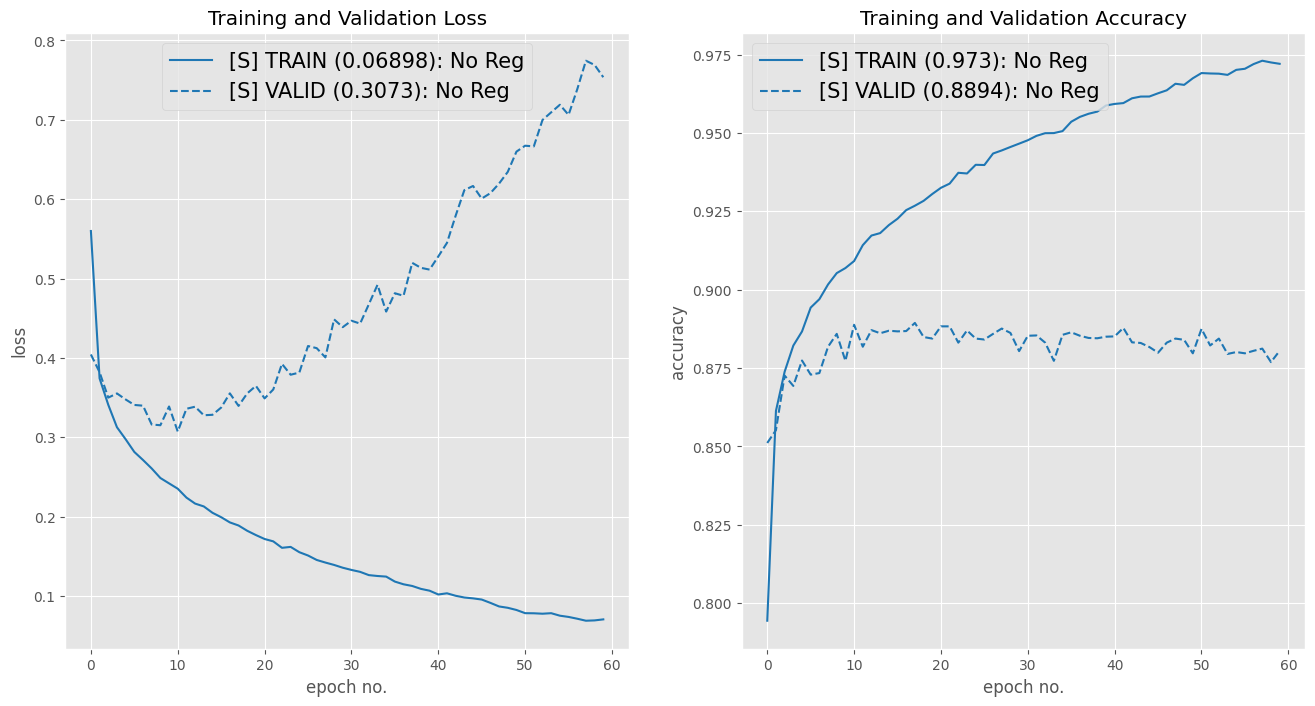

In [23]:
plot_loss_accuracy(train_loss=[train_loss_exp1], 
                   val_loss=[val_loss_exp1], 
                   train_acc=[train_acc_exp1], 
                   val_acc=[val_acc_exp1], 
                   labels=['No Reg'], 
                   colors=['blue'], 
                   model_sizes=['S'], 
                   loss_legend_loc='upper center', 
                   acc_legend_loc='upper left')

## Средняя модель (М)

In [24]:
class MediumModel(nn.Module):
    def __init__(self, dropout=0.0, batch_norm=False):
        super().__init__()

        if batch_norm:
            self._body = nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5),
                nn.BatchNorm2d(16),
                nn.ReLU(inplace=True),

                nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5),
                nn.BatchNorm2d(32),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2),
                # Adaptive Avg pool: https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html
                # Adaptive Max pool: https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveMaxPool2d.html

                nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
                nn.BatchNorm2d(64),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2),
                nn.Dropout(dropout)
            )
        else:
             self._body = nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5),
                nn.ReLU(inplace=True),

                nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2),

                nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2),
                nn.Dropout(dropout)
            )
            
        self._head = nn.Sequential(
            
            nn.Linear(in_features=64 * 4 * 4, out_features=512), 
            nn.ReLU(inplace=True),
            nn.Dropout(dropout),
            
            nn.Linear(in_features=512, out_features=128), 
            nn.ReLU(inplace=True),
            nn.Dropout(dropout),
            
            nn.Linear(in_features=128, out_features=10)
        )

    def forward(self, x):
        x = self._body(x)
        x = x.view(x.size()[0], -1)
        x = self._head(x)
        return x

## Э-2: Средняя модель (М) без аугментации данных

In [25]:
model = MediumModel()
print(model)

optimizer, scheduler = get_optimizer_and_scheduler(model)
model, train_loss_exp2, train_acc_exp2, val_loss_exp2, val_acc_exp2 = main(model, optimizer, scheduler)

MediumModel(
  (_body): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout(p=0.0, inplace=False)
  )
  (_head): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.0, inplace=False)
    (3): Linear(in_features=512, out_features=128, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.0, inplace=False)
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)
Epoch: 0 Train Loss: 0.540264 Acc: 0.7988
Elapsed 12.16s, 12.16 s/epoch, 0.01 s/batch, ets 717.26s

Test set: Average loss: 0.3503, Accuracy: 87


Test set: Average loss: 0.8671, Accuracy: 9216/10000 (92%)

Epoch: 46 Train Loss: 0.000025 Acc: 1.0000
Elapsed 877.14s, 18.66 s/epoch, 0.01 s/batch, ets 242.61s

Test set: Average loss: 0.8700, Accuracy: 9214/10000 (92%)

Epoch: 47 Train Loss: 0.000024 Acc: 1.0000
Elapsed 895.69s, 18.66 s/epoch, 0.01 s/batch, ets 223.92s

Test set: Average loss: 0.8730, Accuracy: 9214/10000 (92%)

Epoch: 48 Train Loss: 0.000023 Acc: 1.0000
Elapsed 914.31s, 18.66 s/epoch, 0.01 s/batch, ets 205.25s

Test set: Average loss: 0.8755, Accuracy: 9214/10000 (92%)

Epoch: 49 Train Loss: 0.000022 Acc: 1.0000
Elapsed 932.88s, 18.66 s/epoch, 0.01 s/batch, ets 186.58s

Test set: Average loss: 0.8780, Accuracy: 9217/10000 (92%)

Epoch: 50 Train Loss: 0.000021 Acc: 1.0000
Elapsed 951.83s, 18.66 s/epoch, 0.01 s/batch, ets 167.97s

Test set: Average loss: 0.8805, Accuracy: 9215/10000 (92%)

Epoch: 51 Train Loss: 0.000021 Acc: 1.0000
Elapsed 970.82s, 18.67 s/epoch, 0.01 s/batch, ets 149.36s

Test set: Average loss: 0.8

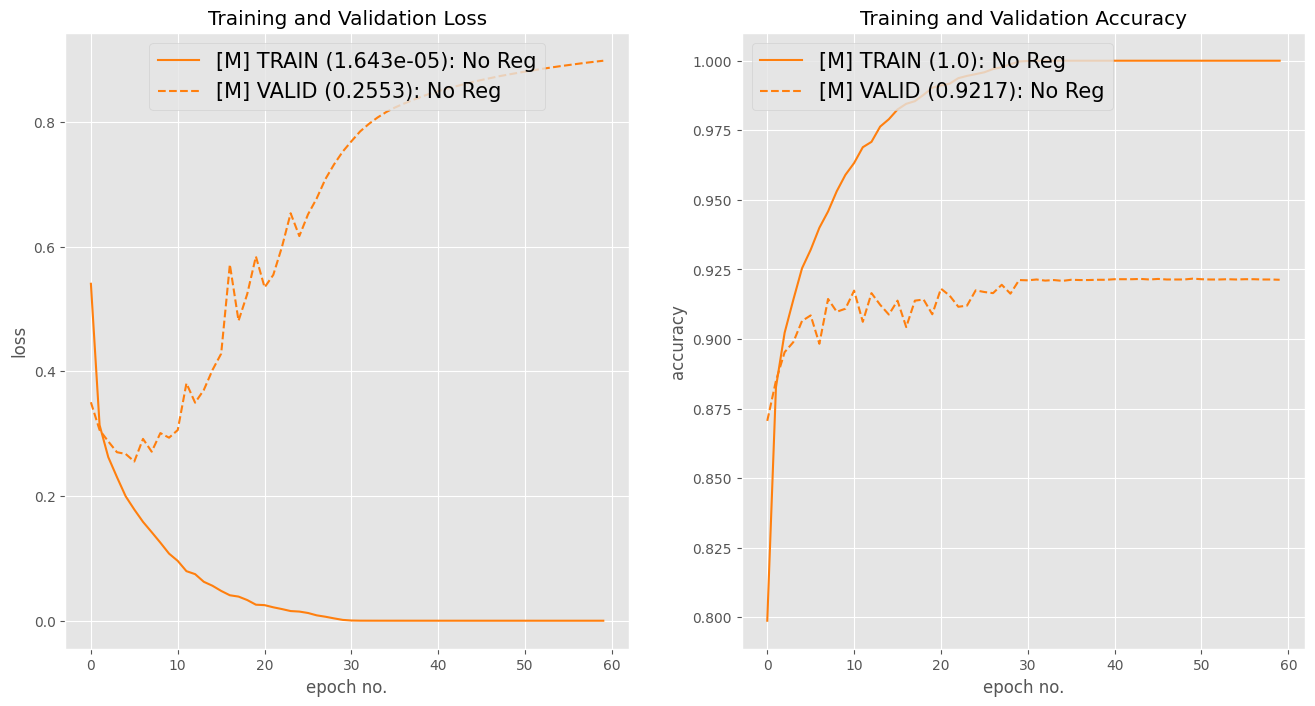

In [26]:
plot_loss_accuracy(train_loss=[train_loss_exp2], 
                   val_loss=[val_loss_exp2], 
                   train_acc=[train_acc_exp2], 
                   val_acc=[val_acc_exp2], 
                   labels=['No Reg'], 
                   colors=['orange'], 
                   model_sizes=['M'], 
                   loss_legend_loc='upper center', 
                   acc_legend_loc='upper left')

Сеть достигла точности обучения, равной **1**, и потери при обучении почти равны **0**. Т.е. она обладает требуемой сложнсотью для этих данных. Но loss и acc при проверке и близко не соответствуют тому что при обучении - модель пытается запомнить обучающие данные

## Э-3: Средняя модель (М) + batchnorm

In [27]:
model = MediumModel(batch_norm=True)

optimizer, scheduler = get_optimizer_and_scheduler(model)
model, train_loss_exp3, train_acc_exp3, val_loss_exp3, val_acc_exp3 = main(model, optimizer, scheduler)

Epoch: 0 Train Loss: 0.443981 Acc: 0.8366
Elapsed 12.76s, 12.76 s/epoch, 0.01 s/batch, ets 752.90s

Test set: Average loss: 0.3401, Accuracy: 8760/10000 (88%)

Epoch: 1 Train Loss: 0.290744 Acc: 0.8941
Elapsed 30.15s, 15.07 s/epoch, 0.01 s/batch, ets 874.22s

Test set: Average loss: 0.2924, Accuracy: 8914/10000 (89%)

Epoch: 2 Train Loss: 0.243070 Acc: 0.9097
Elapsed 49.00s, 16.33 s/epoch, 0.01 s/batch, ets 931.03s

Test set: Average loss: 0.2527, Accuracy: 9064/10000 (91%)

Epoch: 3 Train Loss: 0.208066 Acc: 0.9227
Elapsed 69.23s, 17.31 s/epoch, 0.01 s/batch, ets 969.17s

Test set: Average loss: 0.2481, Accuracy: 9103/10000 (91%)

Epoch: 4 Train Loss: 0.181826 Acc: 0.9311
Elapsed 88.73s, 17.75 s/epoch, 0.01 s/batch, ets 975.98s

Test set: Average loss: 0.2446, Accuracy: 9156/10000 (92%)

Epoch: 5 Train Loss: 0.158506 Acc: 0.9403
Elapsed 109.25s, 18.21 s/epoch, 0.01 s/batch, ets 983.29s

Test set: Average loss: 0.2351, Accuracy: 9163/10000 (92%)

Epoch: 6 Train Loss: 0.139897 Acc: 0.94

Epoch: 51 Train Loss: 0.000121 Acc: 1.0000
Elapsed 1026.29s, 19.74 s/epoch, 0.01 s/batch, ets 157.89s

Test set: Average loss: 0.6806, Accuracy: 9240/10000 (92%)

Epoch: 52 Train Loss: 0.000105 Acc: 1.0000
Elapsed 1046.36s, 19.74 s/epoch, 0.01 s/batch, ets 138.20s

Test set: Average loss: 0.6865, Accuracy: 9241/10000 (92%)

Epoch: 53 Train Loss: 0.000081 Acc: 1.0000
Elapsed 1066.46s, 19.75 s/epoch, 0.01 s/batch, ets 118.50s

Test set: Average loss: 0.6762, Accuracy: 9235/10000 (92%)

Epoch: 54 Train Loss: 0.000071 Acc: 1.0000
Elapsed 1086.74s, 19.76 s/epoch, 0.01 s/batch, ets 98.79s

Test set: Average loss: 0.6819, Accuracy: 9240/10000 (92%)

Epoch: 55 Train Loss: 0.000077 Acc: 1.0000
Elapsed 1107.64s, 19.78 s/epoch, 0.01 s/batch, ets 79.12s

Test set: Average loss: 0.6920, Accuracy: 9244/10000 (92%)

Epoch: 56 Train Loss: 0.000077 Acc: 1.0000
Elapsed 1127.92s, 19.79 s/epoch, 0.01 s/batch, ets 59.36s

Test set: Average loss: 0.6871, Accuracy: 9234/10000 (92%)

Epoch: 57 Train Loss: 0.0

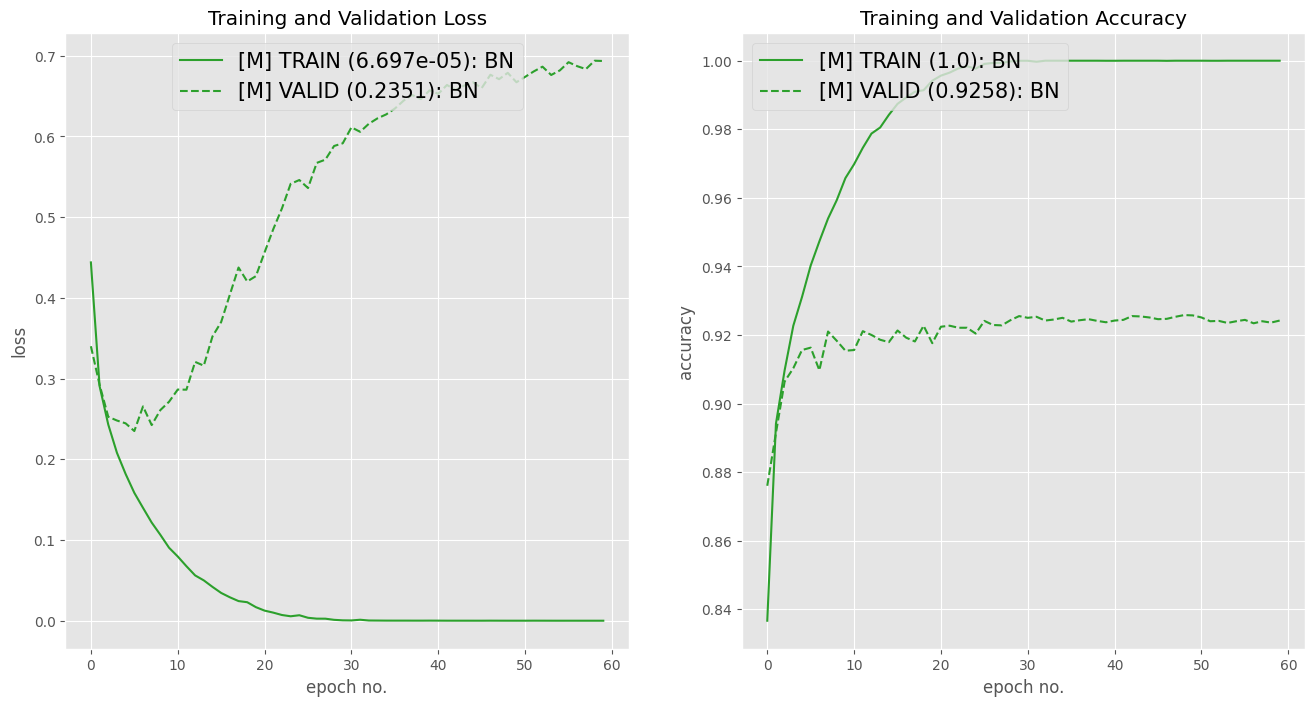

In [30]:
plot_loss_accuracy(train_loss=[train_loss_exp3], 
                   val_loss=[val_loss_exp3], 
                   train_acc=[train_acc_exp3], 
                   val_acc=[val_acc_exp3], 
                   labels=['BN'], 
                   colors=['green'], 
                   model_sizes=['M'], 
                   loss_legend_loc='upper center', 
                   acc_legend_loc='upper left')

## Э-4: Средняя модель (М) + dropout

Добавляем слои dropout, значения не "жесткие", например: `0.25`.

In [ ]:
model = MediumModel(0.25)

optimizer, scheduler = get_optimizer_and_scheduler(model)
model, train_loss_exp4, train_acc_exp4, val_loss_exp4, val_acc_exp4 = main(model, optimizer, scheduler)

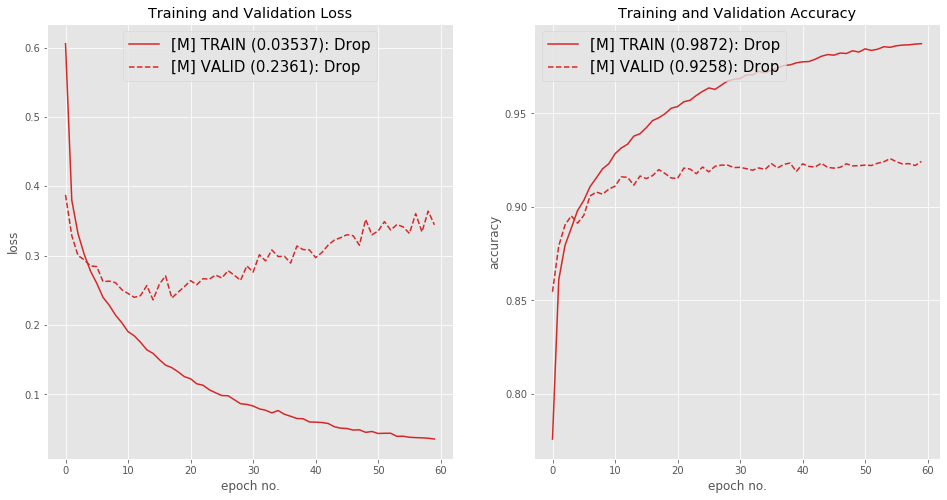

In [45]:
plot_loss_accuracy(train_loss=[train_loss_exp4], 
                   val_loss=[val_loss_exp4], 
                   train_acc=[train_acc_exp4], 
                   val_acc=[val_acc_exp4], 
                   labels=['Drop'], 
                   colors=['red'], 
                   model_sizes=['M'], 
                   loss_legend_loc='upper center', 
                   acc_legend_loc='upper left')

Очевидно, что добавление dropout влияет на кривые проверки значительно сильнее batchnorm. Это как бы тренировка сети на недостающих данных, в прцессе она осваивает более надежные признаки.

## Э-5: Средняя модель (М) + batchnorm + dropout

**Двойная доза улучшайзеров!**

In [ ]:
model = MediumModel(0.25, batch_norm=True)

optimizer, scheduler = get_optimizer_and_scheduler(model)
model, train_loss_exp5, train_acc_exp5, val_loss_exp5, val_acc_exp5 = main(model, optimizer, scheduler)

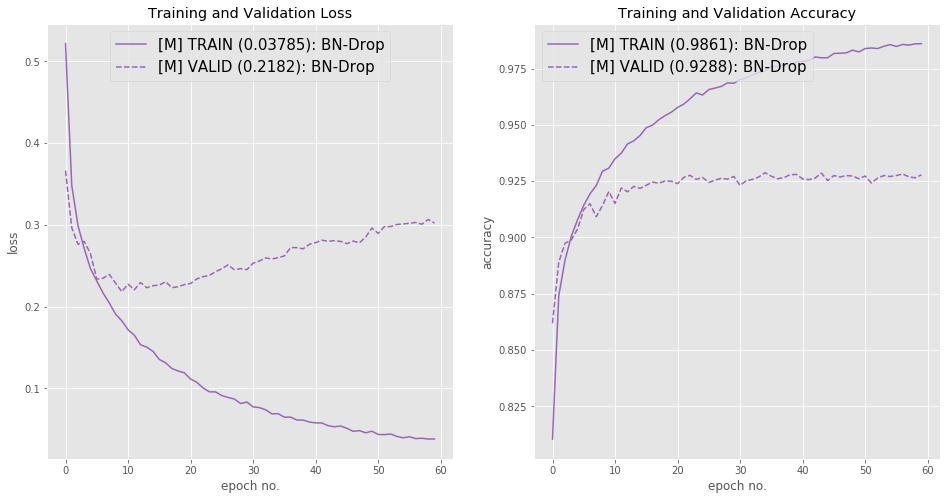

In [44]:
plot_loss_accuracy(train_loss=[train_loss_exp5], 
                   val_loss=[val_loss_exp5], 
                   train_acc=[train_acc_exp5], 
                   val_acc=[val_acc_exp5], 
                   labels=['BN-Drop'], 
                   colors=['purple'], 
                   model_sizes=['M'], 
                   loss_legend_loc='upper center', 
                   acc_legend_loc='upper left')

Эффект слабый, но loss стал стабильнее, хотя переобучение победиь до конца не удалось...

## Э-6: Средняя модель (М) + data augmentation

**Наконец, главный козырь!** Добавим аугментации. Это должно дать существенное влияние - мы по сути обучаем НС на большем количестве данных. Используем функцию `get_data`, написанную в самом начале.

**Важно:** аугментации не добавляются в данные. Этот метод увеличивает объем данных только во время обучения, создавая заданные преобразования исходных данных.

In [ ]:
model = MediumModel()

optimizer, scheduler = get_optimizer_and_scheduler(model)
model, train_loss_exp6, train_acc_exp6, val_loss_exp6, val_acc_exp6 = main(model, optimizer, scheduler, data_augmentation=True)

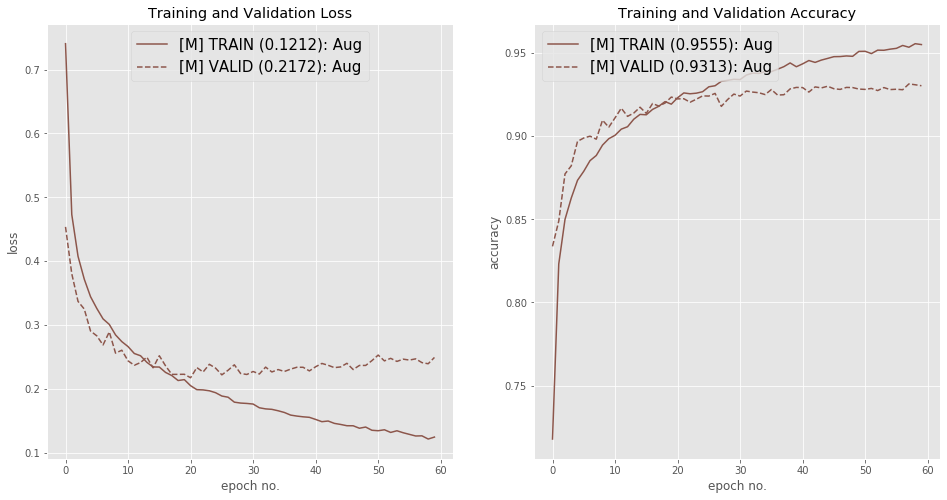

In [43]:
plot_loss_accuracy(train_loss=[train_loss_exp6], 
                   val_loss=[val_loss_exp6], 
                   train_acc=[train_acc_exp6], 
                   val_acc=[val_acc_exp6], 
                   labels=['Aug'], 
                   colors=['brown'], 
                   model_sizes=['M'], 
                   loss_legend_loc='upper center', 
                   acc_legend_loc='upper left')

Кривая loss на проверке почти не растет. **Почти удалось победить переобучние!** Но только почти...

## Э-7: Средняя модель (М) + data augmentation + batchnorm + dropout!

**Пора выжать из этой сетки максимум!**

In [ ]:
model = MediumModel(0.25, batch_norm=True)

optimizer, scheduler = get_optimizer_and_scheduler(model)
model, train_loss_exp7, train_acc_exp7, val_loss_exp7, val_acc_exp7 = main(model, optimizer, scheduler, data_augmentation=True)

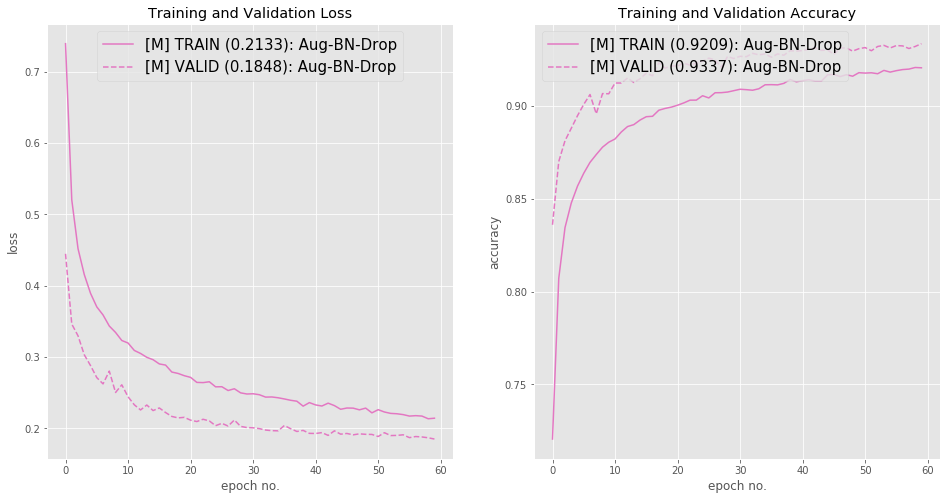

In [42]:
plot_loss_accuracy(train_loss=[train_loss_exp7], 
                   val_loss=[val_loss_exp7], 
                   train_acc=[train_acc_exp7], 
                   val_acc=[val_acc_exp7], 
                   labels=['Aug-BN-Drop'], 
                   colors=['pink'], 
                   model_sizes=['M'], 
                   loss_legend_loc='upper center', 
                   acc_legend_loc='upper left')

# Заключение
1. Начните с простой модели, которая подходит по сложности для обучающих данных. 
1. Затем используйте различные методы регуляризации, оптимизаторы и планировщики.
1. Принцип одно изменение - сразу эксперимент
1. Не увлекаться аугментациями - не надо жестких искажений и много разных аугментаций, все легко испорить (**признак - хорошая модель начинает проседать по loss и accuracy даже на обучниии**)
1. Если результаты вас не удовлетворяют, измените модель и поэкспериментируйте еще раз.

## Аугментация данных - инструменты
1. Модуль [torchvision.transforms](https://pytorch.org/vision/0.9/transforms.html) из экосистемы pytorch
2. Фреймворк [Albumentations](https://albumentations.ai/), интеграции с Huggig Face и Roboflow

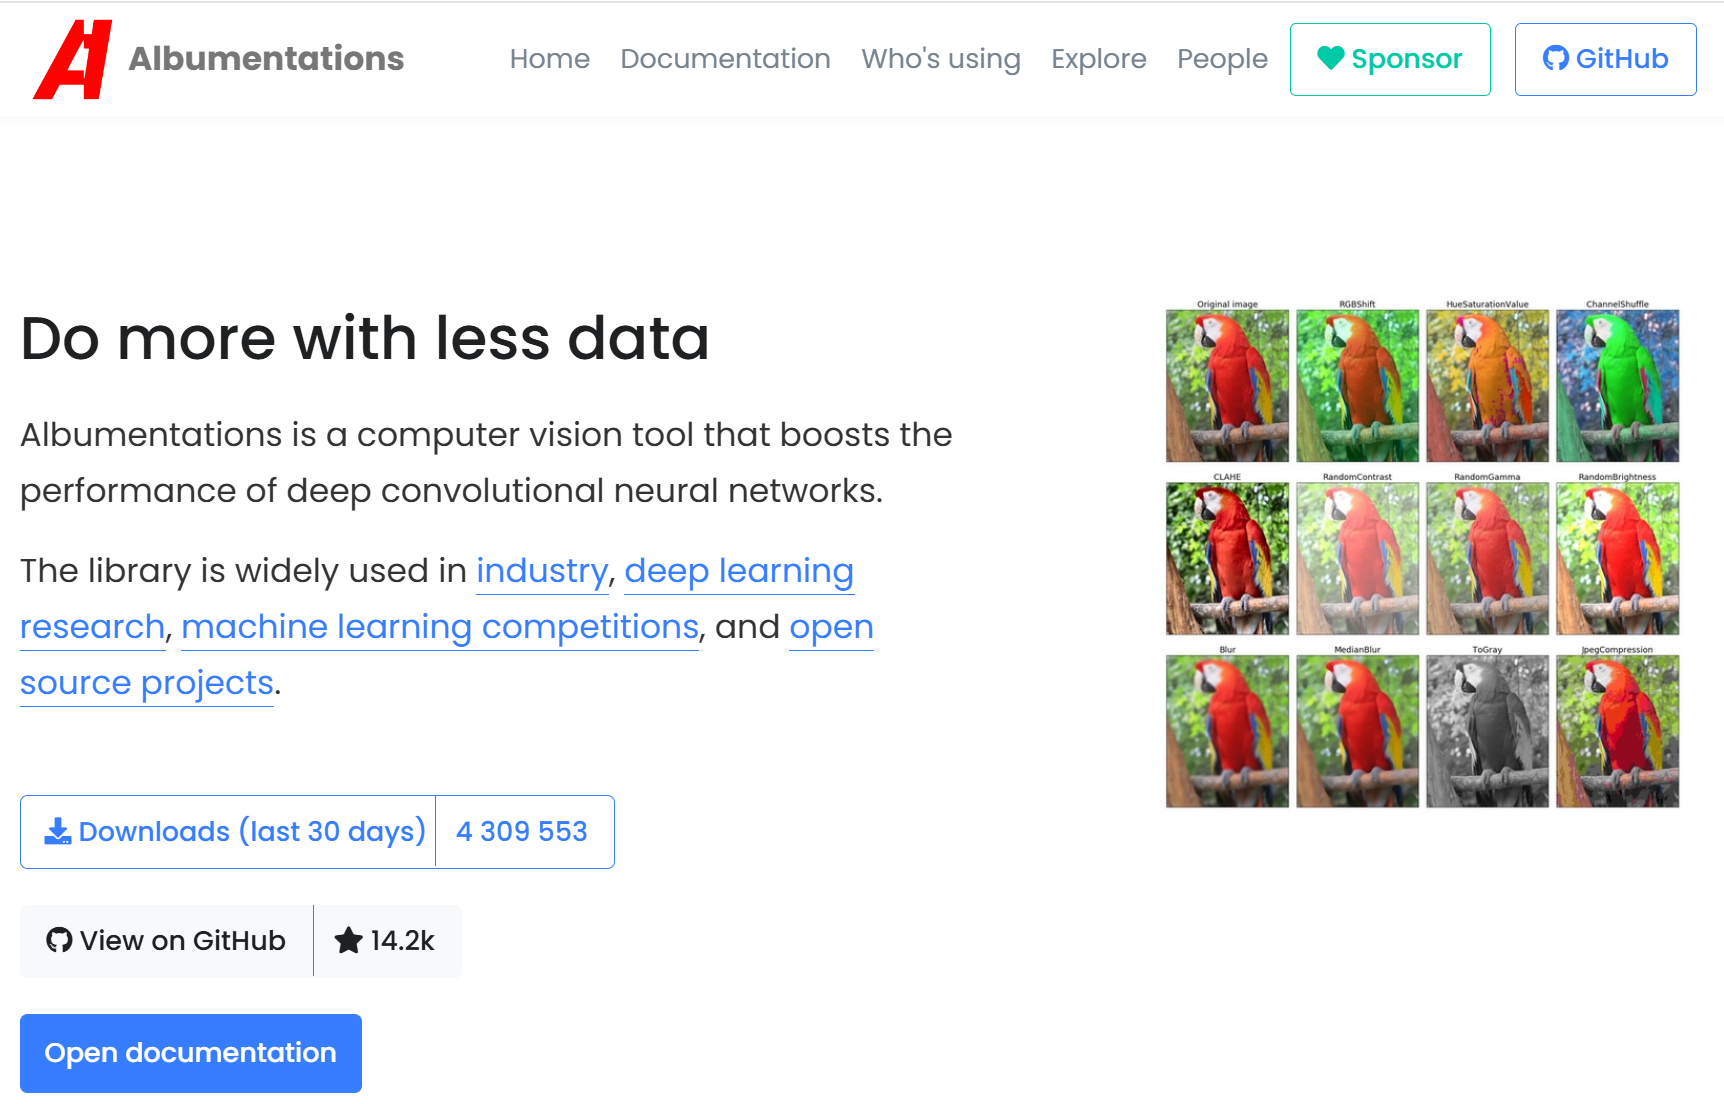

In [32]:
from torchvision import transforms

print(dir(transforms))

['AugMix', 'AutoAugment', 'AutoAugmentPolicy', 'CenterCrop', 'ColorJitter', 'Compose', 'ConvertImageDtype', 'ElasticTransform', 'FiveCrop', 'GaussianBlur', 'Grayscale', 'InterpolationMode', 'Lambda', 'LinearTransformation', 'Normalize', 'PILToTensor', 'Pad', 'RandAugment', 'RandomAdjustSharpness', 'RandomAffine', 'RandomApply', 'RandomAutocontrast', 'RandomChoice', 'RandomCrop', 'RandomEqualize', 'RandomErasing', 'RandomGrayscale', 'RandomHorizontalFlip', 'RandomInvert', 'RandomOrder', 'RandomPerspective', 'RandomPosterize', 'RandomResizedCrop', 'RandomRotation', 'RandomSolarize', 'RandomVerticalFlip', 'Resize', 'TenCrop', 'ToPILImage', 'ToTensor', 'TrivialAugmentWide', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_functional_pil', '_functional_tensor', '_presets', 'autoaugment', 'functional', 'transforms']


### Метод Compose
Аналог ``nn.Sequential()`` для слоев - но для трансформаций. Из функции **```get_data```**:

In [33]:
train_transforms = transforms.Compose([
            transforms.RandomChoice([
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.RandomRotation(20, fill=(0,)),
                transforms.RandomCrop(28, padding=4)
            ]),
            transforms.ToTensor(),
            transforms.Normalize((0.2860, ), (0.3530, ))
        ])

In [34]:
train_transforms

Compose(
    RandomChoice(
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=(0,))
    RandomCrop(size=(28, 28), padding=4)
)(p=None)
    ToTensor()
    Normalize(mean=(0.286,), std=(0.353,))
)